In [104]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy.stats import skew

In [105]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")


In [106]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [108]:
train_df.shape

(1460, 81)

In [109]:
test_df.shape

(1459, 80)

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [111]:
prices = pd.DataFrame({'price':train_df.SalePrice,'log(x+1)':np.log1p(train_df.SalePrice)})
prices.head()

,price,log(x+1)
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(x+1)'}>]], dtype=object)

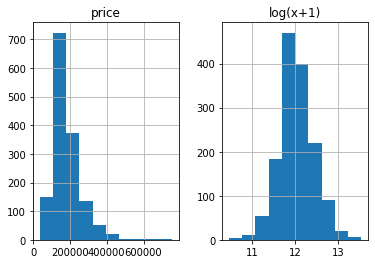

In [112]:
prices.hist()

In [113]:
skew(prices.price)

1.880940746034036

In [114]:
skew(prices["log(x+1)"])

0.12122191311528363

In [115]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

In [116]:
all_data = pd.concat((train_df.loc[:,"MSSubClass":"SaleCondition"], test_df.loc[:,"MSSubClass":"SaleCondition"]))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [117]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [118]:
skew_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna()))
skew_feats.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

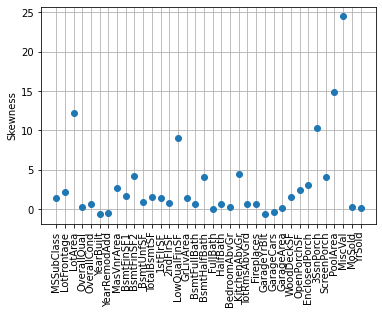

In [119]:
plt.grid()
plt.ylabel("Skewness")
plt.xticks(rotation='vertical')
plt.plot(skew_feats, 'o')

In [120]:
skewed_feats = skew_feats[skew_feats > 0.75]
skewed_feats.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

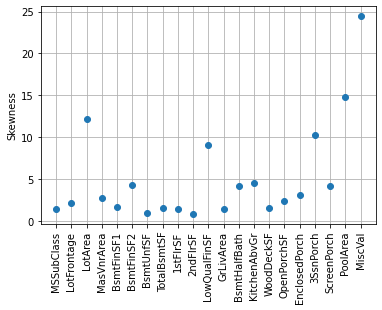

In [121]:
plt.grid()
plt.ylabel("Skewness")
plt.xticks(rotation='vertical')
plt.plot(skewed_feats, 'o')

In [122]:
all_data[skewed_feats.index] = np.log1p(all_data[skewed_feats.index])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [123]:
cc_data = pd.get_dummies(train_df["LotShape"])
cc_data["LotShape"] = train_df["LotShape"]

cc_data.head()

,IR1,IR2,IR3,Reg,LotShape
0,0,0,0,1,Reg
1,0,0,0,1,Reg
2,1,0,0,0,IR1
3,1,0,0,0,IR1
4,1,0,0,0,IR1


In [124]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [125]:
all_data = all_data.fillna(all_data[:train_df.shape[0]].mean())

In [126]:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
y = train_df.SalePrice

In [127]:
X_train.shape, X_test.shape, y.shape

((1460, 288), (1459, 288), (1460,))

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
def rmse_cv(model):
    rmse = np.sqrt(
        -cross_val_score(
            model, 
            X_train, 
            y,
            scoring="neg_mean_squared_error",
            cv=5
        )
    )

    return rmse

In [130]:
from sklearn.linear_model import Ridge

In [131]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.5, 1, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

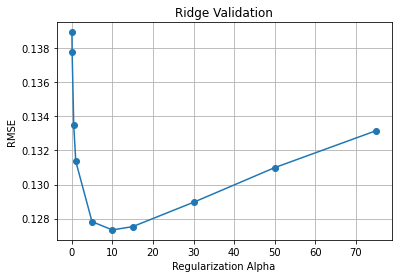

In [132]:
plt.title("Ridge Validation")
plt.ylabel("RMSE")
plt.xlabel("Regularization Alpha")
plt.grid()
plt.plot(alphas, cv_ridge, "o-")

In [133]:
model = Ridge(alpha=10)
model.fit(X_train, y)
model.score(X_train, y)

0.9299579771565469

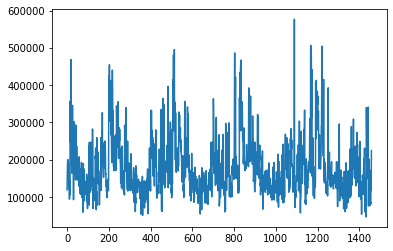

In [134]:
y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)
plt.plot(y_pred)

In [135]:
solution = pd.DataFrame({"id": test_df.Id, "SalePrice": y_pred})
solution.to_csv("../report/ridge_sol.csv", index=False)

In [136]:
from sklearn.linear_model import LassoCV

In [137]:
alphas = [5, 1, 0.1, 0.001, 0.0005, 0.0001]
model_lasso = LassoCV(alphas=alphas, max_iter=2000)

In [138]:
rmse_cv(model_lasso)

/home/a-tam/kaggle/house_prices/.venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3488294096810485, tolerance: 0.015531757542978093
  tol, rng, random, positive)


array([0.10330995, 0.13147299, 0.12552458, 0.10530461, 0.14723333])

/home/a-tam/kaggle/house_prices/.venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3488294096810485, tolerance: 0.015531757542978093
  tol, rng, random, positive)


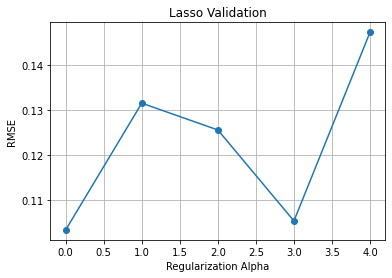

In [139]:
plt.title("Lasso Validation")
plt.ylabel("RMSE")
plt.xlabel("Regularization Alpha")
plt.grid()
plt.plot(rmse_cv(model_lasso), "o-")

In [140]:
rmse_cv(model_lasso).mean(), rmse_cv(model_lasso).min()

/home/a-tam/kaggle/house_prices/.venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3488294096810485, tolerance: 0.015531757542978093
  tol, rng, random, positive)
/home/a-tam/kaggle/house_prices/.venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3488294096810485, tolerance: 0.015531757542978093
  tol, rng, random, positive)


(0.12256909294466992, 0.1033099507189642)

In [141]:
model_lasso.fit(X_train, y)
model_lasso.score(X_train, y)

/home/a-tam/kaggle/house_prices/.venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09962860417662078, tolerance: 0.018002191385488822
  tol, rng, random, positive)


0.9308222932797677

In [142]:
y_pred =  np.expm1(model_lasso.predict(X_test))
y_pred

array([119959.2336756 , 151482.61404124, 180201.11824571, ...,
       169024.31664258, 118943.74446885, 228402.85312774])

In [143]:
solution = pd.DataFrame({"id": test_df.Id, "SalePrice": y_pred})
solution.to_csv("../report/lasso_sol.csv", index=False)

In [144]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y)
model_rfr.score(X_train, y)

y_pred = np.expm1(model_rfr.predict(X_test))

solution = pd.DataFrame({"id": test_df.Id, "SalePrice": y_pred})
solution.to_csv("../report/rfr_sol.csv", index=False)

In [145]:
rmse_cv(model_rfr)

array([0.13807453, 0.15713332, 0.14345382, 0.13266452, 0.14910929])

In [146]:
import xgboost as xgb

In [147]:
d_train = xgb.DMatrix(X_train, label = y)

In [157]:
params = {
    "max_depth" : 5, 
    "eta" : 0.1
    }

cross_val = xgb.cv(
    params,
    d_train,
    num_boost_round = 1000,
    early_stopping_rounds = 50
)

In [158]:
cross_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   train-rmse-mean  464 non-null    float64
 1   train-rmse-std   464 non-null    float64
 2   test-rmse-mean   464 non-null    float64
 3   test-rmse-std    464 non-null    float64
dtypes: float64(4)
memory usage: 14.6 KB


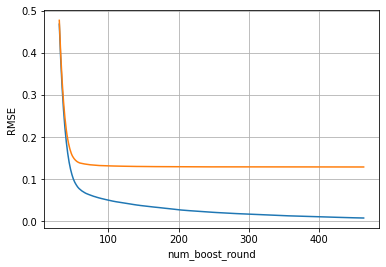

In [159]:
plt.ylabel("RMSE")
plt.xlabel("num_boost_round")
plt.grid()
plt.plot(cross_val.loc[30:,["train-rmse-mean","test-rmse-mean"]])

In [160]:
model_xgb = xgb.XGBRegressor(
    n_estimators = 463,
    max_depth = 5,
    learning_rate = 0.1
)

model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=463, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
rmse_cv(model_xgb).mean()

0.12821814992067215

In [162]:
pred_models = [model, model_lasso, model_rfr, model_xgb]

Y_preds = []

for p_model in pred_models:
    Y_preds.append(np.expm1(p_model.predict(X_test)))    

np.array(Y_preds).shape

(4, 1459)

In [163]:
coefs = [0.05, 0.24, 0.01, 0.7]
final_preds = np.dot(coefs,Y_preds)

final_preds.shape

(1459,)

In [165]:
solution = pd.DataFrame({"id": test_df.Id, "SalePrice":final_preds})
solution.to_csv("../report/final_sol.csv", index=False)
solution.head()

,id,SalePrice
0,1461,123332.477932
1,1462,156000.452219
2,1463,183075.371274
3,1464,190003.113618
4,1465,197048.562337
